- **Problem Statement:** In this assignment, you are going to build a regression algorithm to predict sales values for multiple retail stores
- **Dataset:** store_sales zip file: sales.csv and store.csv

**Dataset Description:**

- sales.csv: For multiple stores, we have daily sales values for multiple years.
- store.csv: Each row provides metadata about a particular store

**Questions**

    1. Join these datasets using Store column
    2. Fill missing values using appropriate techniques
    3. Extract new columns from date column and ignore the Data column
    4. Ignore the customer column for this analysis, since we might not know the customer count for future dates. Hence this column should not be an input to the model
    5. Convert non-numerical columns to numerical columns using appropriate methods
    6. Split data in to training (80%) and testing (20%) (use random_state=1)
    7. Standardize all input columns using StandardScaler function in sklearn
    8. Using relevant influencing columns, build a linear regression model
    9. Report RMSE, R square value
    10. Plot the coefficients of the input variables using the bar chart

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales = pd.read_csv("store_sales_dataset/sales.csv")

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [4]:
sales["Date"] = pd.to_datetime(sales["Date"], format="%Y-%m-%d")

In [5]:
sales["DayOfWeek"] = pd.to_numeric(sales["DayOfWeek"])

In [6]:
sales["Sales"] = pd.to_numeric(sales["Sales"])

In [7]:
sales["Customers"] = pd.to_numeric(sales["Customers"])

In [8]:
sales["Open"] = pd.to_numeric(sales["Open"])

In [9]:
sales["Promo"] = pd.to_numeric(sales["Promo"])

In [10]:
sales["SchoolHoliday"] = pd.to_numeric(sales["SchoolHoliday"])

In [11]:
sales["Open"] = pd.to_numeric(sales["Open"])

In [14]:
# If there is a state holiday that indicates a sales holiday too.
def salesHoliday(s):
    StateHoliday = s['StateHoliday']
    Sales = s['Sales']
    return_val = StateHoliday
    if (StateHoliday!='0'):
        if (Sales > 0):
            return_val = 0
        else:
            return_val = 1
    return return_val

In [15]:
sales["StateHoliday"] = pd.to_numeric(sales[["StateHoliday", "Sales"]].apply(salesHoliday, axis=1))

In [16]:
sales["StateHoliday"].value_counts()

0    844338
1    172871
Name: StateHoliday, dtype: int64

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  int64         
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 69.8 MB


In [17]:
store = pd.read_csv("store_sales_dataset/store.csv")

In [18]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [21]:
store["PromoInterval"].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

#### Creating dummies for Promotion Interval with three groups Jan,Apr,Jul,Oct; Feb,May,Aug,Nov and Mar,Jun,Sept,Dec

In [20]:
dumm = pd.get_dummies(store["PromoInterval"])

In [21]:
store1 = pd.concat([store, dumm], axis=1)

In [22]:
store1.rename(columns={"Jan,Apr,Jul,Oct":"PromoIntervalJan", "Feb,May,Aug,Nov":"PromoIntervalFeb", "Mar,Jun,Sept,Dec":"PromoIntervalMar"}, inplace=True)

In [84]:
store1.drop(columns="PromoInterval", inplace=True)

In [85]:
store1

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoIntervalFeb,PromoIntervalJan,PromoIntervalMar
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,0,1,0
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,0,1,0
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,0,1,0
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0,0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0,0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0,0,0


In [86]:
store1["CompetitionOpenSinceMonth"] = store1["CompetitionOpenSinceMonth"].fillna(store1['CompetitionOpenSinceMonth'].mode())

In [87]:
store1["CompetitionOpenSinceYear"] = store1["CompetitionOpenSinceYear"].fillna(store1['CompetitionOpenSinceYear'].mode())

In [88]:
store1["Promo2SinceWeek"] = store1["Promo2SinceWeek"].fillna(0)

In [89]:
store1["Promo2SinceYear"] = store1["Promo2SinceYear"].fillna(0)

In [90]:
store1["CompetitionOpenSinceMonth"] = store1["CompetitionOpenSinceMonth"].fillna(0)

In [91]:
store1["CompetitionOpenSinceYear"] = store1["CompetitionOpenSinceYear"].fillna(0)

In [92]:
store1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoIntervalFeb           1115 non-null   uint8  
 10  PromoIntervalJan           1115 non-null   uint8  
 11  PromoIntervalMar           1115 non-null   uint8  
dtypes: float64(5), int64(2), object(2), uint8(3)
memory usage: 81.8+ KB


In [93]:
store1.sort_values(by="CompetitionDistance", ascending=False)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoIntervalFeb,PromoIntervalJan,PromoIntervalMar
452,453,a,c,75860.0,0.0,0.0,0,0.0,0.0,0,0,0
121,122,a,c,58260.0,4.0,2013.0,0,0.0,0.0,0,0,0
800,801,d,a,48330.0,4.0,2013.0,0,0.0,0.0,0,0,0
109,110,a,c,46590.0,4.0,2013.0,0,0.0,0.0,0,0,0
746,747,c,c,45740.0,8.0,2008.0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1007,1008,a,c,30.0,9.0,2010.0,0,0.0,0.0,0,0,0
515,516,a,c,20.0,0.0,0.0,1,35.0,2010.0,0,0,1
290,291,d,a,NaN,0.0,0.0,0,0.0,0.0,0,0,0
621,622,a,c,NaN,0.0,0.0,0,0.0,0.0,0,0,0


In [94]:
store1.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [95]:
sales_store = pd.merge(left=sales, right=store1, how='left')

In [96]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [97]:
sales_store.corr()["Sales"].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.894711
Open                         0.678472
Promo                        0.452345
SchoolHoliday                0.085124
Store                        0.005126
CompetitionOpenSinceYear     0.002749
CompetitionOpenSinceMonth   -0.012431
CompetitionDistance         -0.019229
PromoIntervalJan            -0.034946
PromoIntervalFeb            -0.043668
Promo2SinceWeek             -0.044143
PromoIntervalMar            -0.053267
Promo2                      -0.091040
Promo2SinceYear             -0.091056
DayOfWeek                   -0.462125
StateHoliday                -0.678600
Name: Sales, dtype: float64

In [98]:
sales_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [99]:
StoreTypeDummies = pd.get_dummies(sales_store["StoreType"], prefix="StoreType")

In [100]:
StoreTypeDummies

,StoreType_a,StoreType_b,StoreType_c,StoreType_d
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
1017204,1,0,0,0
1017205,0,0,1,0
1017206,1,0,0,0
1017207,1,0,0,0


In [101]:
AssortmentDummies = pd.get_dummies(sales_store["Assortment"], prefix="Assortment")

In [102]:
AssortmentDummies

,Assortment_a,Assortment_b,Assortment_c
0,1,0,0
1,1,0,0
2,1,0,0
3,0,0,1
4,1,0,0
...,...,...,...
1017204,1,0,0
1017205,0,0,1
1017206,0,0,1
1017207,0,0,1


In [103]:
df = pd.concat([sales_store, StoreTypeDummies, AssortmentDummies], axis=1)

In [104]:
df.drop(columns=["StoreType", "Assortment", "Customers"], inplace=True)

In [105]:
df["CompetitionDistance"] = df["CompetitionDistance"].fillna(0)

In [106]:
df["sales_year"] = df["Date"].dt.year
df["sales_month"] = df["Date"].dt.month
df["sales_day"] = df["Date"].dt.day
df.drop(columns="Date", inplace=True)

In [107]:
df

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,sales_year,sales_month,sales_day
0,1,5,5263,1,1,0,1,1270.0,9.0,2008.0,...,0,0,1,0,1,0,0,2015,7,31
1,2,5,6064,1,1,0,1,570.0,11.0,2007.0,...,1,0,0,0,1,0,0,2015,7,31
2,3,5,8314,1,1,0,1,14130.0,12.0,2006.0,...,1,0,0,0,1,0,0,2015,7,31
3,4,5,13995,1,1,0,1,620.0,9.0,2009.0,...,0,0,1,0,0,0,1,2015,7,31
4,5,5,4822,1,1,0,1,29910.0,4.0,2015.0,...,1,0,0,0,1,0,0,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,1,1,1900.0,6.0,2014.0,...,1,0,0,0,1,0,0,2013,1,1
1017205,1112,2,0,0,0,1,1,1880.0,4.0,2006.0,...,0,0,1,0,0,0,1,2013,1,1
1017206,1113,2,0,0,0,1,1,9260.0,0.0,0.0,...,1,0,0,0,0,0,1,2013,1,1
1017207,1114,2,0,0,0,1,1,870.0,0.0,0.0,...,1,0,0,0,0,0,1,2013,1,1


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Open                       1017209 non-null  int64  
 4   Promo                      1017209 non-null  int64  
 5   StateHoliday               1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   CompetitionDistance        1017209 non-null  float64
 8   CompetitionOpenSinceMonth  1017209 non-null  float64
 9   CompetitionOpenSinceYear   1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
 12  Promo2SinceYear            1017209 non-null  float64
 13  PromoInterva

In [109]:
df.corr()["Sales"].sort_values(ascending=False)

Sales                        1.000000
Open                         0.678472
Promo                        0.452345
StoreType_b                  0.139940
SchoolHoliday                0.085124
Assortment_c                 0.068772
Assortment_b                 0.065473
sales_month                  0.048768
sales_year                   0.023519
Store                        0.005126
CompetitionOpenSinceYear     0.002749
StoreType_c                 -0.005140
StoreType_a                 -0.010076
sales_day                   -0.011612
CompetitionOpenSinceMonth   -0.012431
CompetitionDistance         -0.018609
StoreType_d                 -0.022854
PromoIntervalJan            -0.034946
PromoIntervalFeb            -0.043668
Promo2SinceWeek             -0.044143
PromoIntervalMar            -0.053267
Assortment_a                -0.080494
Promo2                      -0.091040
Promo2SinceYear             -0.091056
DayOfWeek                   -0.462125
StateHoliday                -0.678600
Name: Sales,

In [110]:
df.corr()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,sales_year,sales_month,sales_day
Store,1.000000,-8.483588e-06,0.005126,-0.000047,5.786226e-05,0.000057,0.000641,-0.026486,-0.032893,-0.008794,...,0.005579,0.001412,0.060986,-0.051492,-0.006140,0.019328,0.002661,0.000290,0.001467,2.259853e-05
DayOfWeek,-0.000008,1.000000e+00,-0.462125,-0.528963,-3.929253e-01,0.528876,-0.205388,-0.000025,0.000008,0.000007,...,-0.000034,-0.000019,-0.000039,0.000071,0.000052,-0.000007,-0.000051,0.001937,-0.005362,5.136457e-03
Sales,0.005126,-4.621250e-01,1.000000,0.678472,4.523447e-01,-0.678600,0.085124,-0.018609,-0.012431,0.002749,...,-0.010076,0.139940,-0.005140,-0.022854,-0.080494,0.065473,0.068772,0.023519,0.048768,-1.161188e-02
Open,-0.000047,-5.289625e-01,0.678472,1.000000,2.950423e-01,-0.999812,0.086171,0.007989,-0.000200,-0.001144,...,-0.004373,0.051233,-0.004709,-0.005538,-0.006438,0.038631,-0.000522,-0.001009,-0.000681,3.342796e-02
Promo,0.000058,-3.929253e-01,0.452345,0.295042,1.000000e+00,-0.295003,0.067483,0.000141,-0.000039,-0.000034,...,0.000204,0.000108,0.000223,-0.000414,-0.000296,0.000039,0.000290,0.024300,-0.011747,-1.083245e-01
StateHoliday,0.000057,5.288760e-01,-0.678600,-0.999812,-2.950035e-01,1.000000,-0.086144,-0.008038,0.000204,0.001134,...,0.004403,-0.051181,0.004729,0.005477,0.006466,-0.038552,0.000480,0.000986,0.000657,-3.342737e-02
SchoolHoliday,0.000641,-2.053883e-01,0.085124,0.086171,6.748281e-02,-0.086144,1.000000,-0.003651,-0.001688,-0.001801,...,-0.000687,0.001825,0.001557,-0.000899,0.002464,0.000608,-0.002576,-0.036535,0.103282,3.053818e-02
CompetitionDistance,-0.026486,-2.504515e-05,-0.018609,0.007989,1.407740e-04,-0.008038,-0.003651,1.000000,-0.032274,-0.000212,...,-0.036473,-0.070934,-0.097117,0.130201,-0.141545,-0.049686,0.150655,0.000716,0.003643,4.958487e-05
CompetitionOpenSinceMonth,-0.032893,8.338445e-06,-0.012431,-0.000200,-3.919081e-05,0.000204,-0.001688,-0.032274,1.000000,0.784968,...,0.037553,-0.039814,0.015645,-0.041428,0.100431,-0.051397,-0.091268,-0.000203,-0.001037,-1.213118e-05
CompetitionOpenSinceYear,-0.008794,6.677520e-06,0.002749,-0.001144,-3.429440e-05,0.001134,-0.001801,-0.000212,0.784968,1.000000,...,0.058360,-0.039637,0.034669,-0.078003,0.127335,-0.066661,-0.115449,-0.000176,-0.000897,-1.137384e-05


<AxesSubplot:>

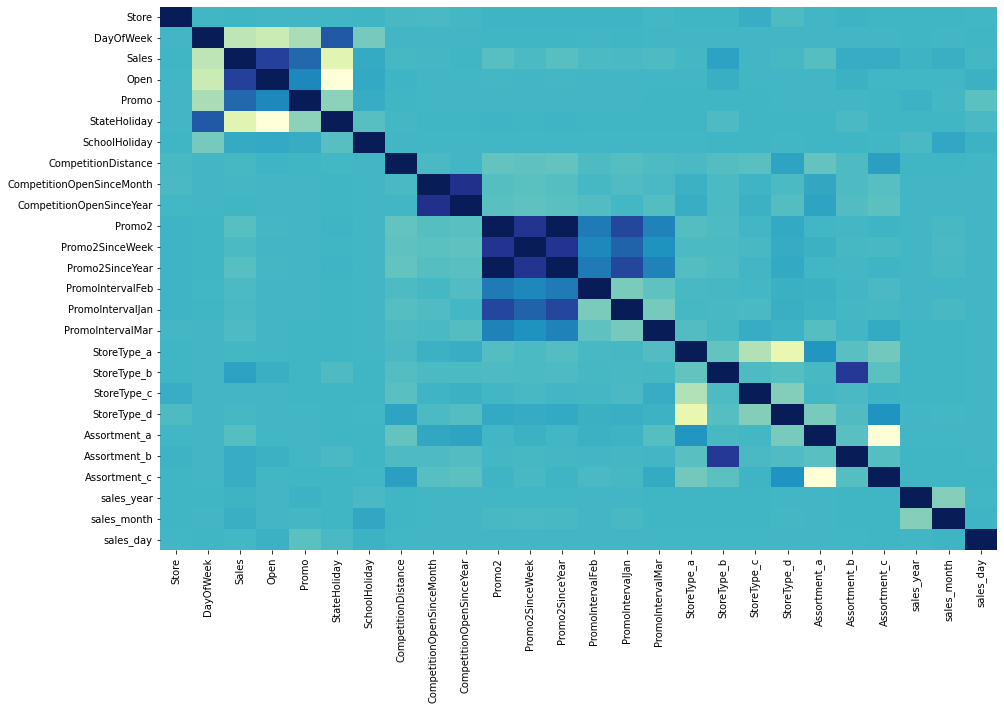

In [111]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=False, fmt = '.4g', cbar=False, ax=ax)

In [112]:
tightly_correlated = ["Promo2", "Promo2SinceWeek", "Promo2SinceYear", "PromoIntervalFeb", "PromoIntervalJan", "PromoIntervalMar"]

In [113]:
## Scale the data, using pandas
def scale(x):
    return (x-np.mean(x))/np.std(x)

In [114]:
df_scaled=df.apply(scale,axis=0)

In [116]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoIntervalFeb', 'PromoIntervalJan',
       'PromoIntervalMar', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'sales_year', 'sales_month', 'sales_day'],
      dtype='object')

In [117]:
scalar = StandardScaler()

In [118]:
df_scaled_std = scalar.fit_transform(df)

In [119]:
df_scaled_std = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)

In [120]:
df_scaled_std

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,sales_year,sales_month,sales_day
0,-1.731640,0.501484,-0.132683,0.452399,1.273237,-0.452484,2.144211,-0.537724,0.950877,0.681904,...,-1.088491,-0.125731,2.536447,-0.666551,0.944815,-0.090668,-0.929468,1.502077,0.346724,1.740766
1,-1.728534,0.501484,0.075373,0.452399,1.273237,-0.452484,2.144211,-0.628512,1.417781,0.680835,...,0.918703,-0.125731,-0.394252,-0.666551,0.944815,-0.090668,-0.929468,1.502077,0.346724,1.740766
2,-1.725427,0.501484,0.659800,0.452399,1.273237,-0.452484,2.144211,1.130186,1.651232,0.679765,...,0.918703,-0.125731,-0.394252,-0.666551,0.944815,-0.090668,-0.929468,1.502077,0.346724,1.740766
3,-1.722321,0.501484,2.135414,0.452399,1.273237,-0.452484,2.144211,-0.622027,0.950877,0.682973,...,-1.088491,-0.125731,2.536447,-0.666551,-1.058408,-0.090668,1.075884,1.502077,0.346724,1.740766
4,-1.719214,0.501484,-0.247231,0.452399,1.273237,-0.452484,2.144211,3.176813,-0.216381,0.689387,...,0.918703,-0.125731,-0.394252,-0.666551,0.944815,-0.090668,-0.929468,1.502077,0.346724,1.740766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1.716545,-1.000476,-1.499723,-2.210440,-0.785400,2.210025,2.144211,-0.456014,0.250522,0.688318,...,0.918703,-0.125731,-0.394252,-0.666551,0.944815,-0.090668,-0.929468,-1.070616,-1.457193,-1.673123
1017205,1.719651,-1.000476,-1.499723,-2.210440,-0.785400,2.210025,2.144211,-0.458608,-0.216381,0.679765,...,-1.088491,-0.125731,2.536447,-0.666551,-1.058408,-0.090668,1.075884,-1.070616,-1.457193,-1.673123
1017206,1.722758,-1.000476,-1.499723,-2.210440,-0.785400,2.210025,2.144211,0.498560,-1.150188,-1.464856,...,0.918703,-0.125731,-0.394252,-0.666551,-1.058408,-0.090668,1.075884,-1.070616,-1.457193,-1.673123
1017207,1.725864,-1.000476,-1.499723,-2.210440,-0.785400,2.210025,2.144211,-0.589603,-1.150188,-1.464856,...,0.918703,-0.125731,-0.394252,-0.666551,-1.058408,-0.090668,1.075884,-1.070616,-1.457193,-1.673123


In [121]:
def positive(val):
    ret = val
    if val<0:
        ret = val*-1
    return ret

In [122]:
def corrcoef(data, x, y):
    corrcoefval = np.corrcoef(data[x],data[y])[0][1]
    return [x, y, positive(corrcoefval)]

In [123]:
corrcoef(df_scaled_std, x="DayOfWeek", y="Sales")

['DayOfWeek', 'Sales', 0.4621250232272884]

In [124]:
def allcorrcoef(data, arround=""):
    sets = []
    outerloop = data.columns
    if arround!="":
        outerloop = [arround]
    for col1 in outerloop:
        for col2 in data.columns:
            sets.append(corrcoef(df_scaled_std, x=col1, y=col2))
    coefdf = pd.DataFrame(sets, columns=["X-Axis", "Y-Axis", "Corr Coef"])
    return coefdf.sort_values(by="Corr Coef", ascending=False, ignore_index=True)

In [125]:
df_corr = allcorrcoef(df_scaled_std, "Sales")

In [126]:
df_corr

,X-Axis,Y-Axis,Corr Coef
0,Sales,Sales,1.000000
1,Sales,StateHoliday,0.678600
2,Sales,Open,0.678472
3,Sales,DayOfWeek,0.462125
4,Sales,Promo,0.452345
5,Sales,StoreType_b,0.139940
6,Sales,Promo2SinceYear,0.091056
7,Sales,Promo2,0.091040
8,Sales,SchoolHoliday,0.085124
9,Sales,Assortment_a,0.080494


In [127]:
only_x = df_scaled_std.copy()

In [128]:
only_x.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoIntervalFeb', 'PromoIntervalJan',
       'PromoIntervalMar', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'sales_year', 'sales_month', 'sales_day'],
      dtype='object')

In [206]:
def training_model(modelname="LinearRegression"):
    from sklearn.linear_model import LinearRegression
    rm = LinearRegression()
    if modelname == "LinearRegression":
        rm = LinearRegression()
    elif modelname == "DecisionTree":
        from sklearn.tree import DecisionTreeClassifier
        dectree = DecisionTreeClassifier(max_depth=3)
        rm = dectree.fit(X_train, y_train)
    return rm

In [207]:
def predict(rm, X_test):
    y_pred = rm.predict(X_test)
    return y_pred

In [208]:
def score(sctype, y_test, y_pred):
    scorevalue = 0
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
    if sctype=="r2":
        scorevalue = r2_score(y_test, y_pred)
    if sctype=="rmse":
        scorevalue = mean_squared_error(y_test, y_pred)
    if sctype=="absolute":
        scorevalue = mean_absolute_error(y_test, y_pred)
    return scorevalue

In [209]:
def train_score(X, y, test_size=0.2, model="LinearRegression"):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    rm = training_model(model)
    rm.fit(X_train, y_train)
    y_pred = predict(rm, X_test)
    scorevalue = score("r2", y_test, y_pred)
    rmse = score("rmse", y_test, y_pred)
    absolute = score("absolute", y_test, y_pred)
    rmse = score("rmse", y_test, y_pred)
    return scorevalue, rmse, absolute, rm

#### Make X and y

1. Making X by dropping "Sales", "DayOfWeek", "Store", "StateHoliday", "SchoolHoliday", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"

In [210]:
X = df_scaled_std.drop(columns=["Sales", "DayOfWeek", "Store", "StateHoliday", "SchoolHoliday", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]).copy()
y = df_scaled_std["Sales"].copy()

In [213]:
scorevalue, rmse, absolute, rm = train_score(X,y,0.2, model="LinearRegression")
print("R2 score is: ",scorevalue)
print("RMSE is: ",rmse)
print("Absolute Error: ",absolute)

R2 score is:  0.566615385837961
RMSE is:  0.43215503179048637
Absolute Error:  0.4582702580250881


In [214]:
col = [
        "PromoIntervalFeb", 
        "PromoIntervalJan", 
        "PromoIntervalMar", 
        "Sales", 
        "DayOfWeek", 
        "Store", 
        "StateHoliday", 
        "SchoolHoliday", 
        "CompetitionOpenSinceMonth", 
        "CompetitionOpenSinceYear"]
X1 = df_scaled_std.drop(columns=col).copy()
scorevalue, rmse, absolute, rm = train_score(X1,y,0.2, model="LinearRegression")
print("R2 score is: ",scorevalue)
print("RMSE is: ",rmse)
print("Absolute Error: ",absolute)

R2 score is:  0.568022678316745
RMSE is:  0.4328117568416345
Absolute Error:  0.4582212079521437


In [215]:
col = [ 
    "Sales", 
    "DayOfWeek", 
    "Store", 
    "StateHoliday", 
    "SchoolHoliday", 
    "CompetitionOpenSinceMonth", 
    "CompetitionOpenSinceYear",
    "Promo",
    "CompetitionDistance",
    "Promo2",
    "Promo2SinceWeek",
    "Promo2SinceYear",
    "PromoIntervalFeb",
    "PromoIntervalJan",
    "PromoIntervalMar",
    "StoreType_a",
    "StoreType_b",
    "StoreType_c",
    "StoreType_d",
    "Assortment_a",
    "Assortment_b",
    "Assortment_c"]
scorevalue, rmse, absolute, rm = train_score(df_scaled_std.drop(columns=col).copy(),y,0.2, model="LinearRegression")
print("R2 score is: ",scorevalue)
print("RMSE is: ",rmse)
print("Absolute Error: ",absolute)

R2 score is:  0.4668812713771935
RMSE is:  0.5326961151442626
Absolute Error:  0.5004028434264036


In [216]:
col = ["Sales", "Open", "DayOfWeek", "Promo", "StateHoliday"]
scorevalue, rmse, absolute, rm = train_score(df_scaled_std.drop(columns=col).copy(),y,0.2, model="LinearRegression")
print("R2 score is: ",scorevalue)
print("RMSE is: ",rmse)
print("Absolute Error: ",absolute)

R2 score is:  0.05099845086961574
RMSE is:  0.9515858257709383
Absolute Error:  0.7376546563586118


In [217]:
correlated_cols = np.array(df_corr['Y-Axis'][1:5])
noncorrelated_cols = np.array(df_corr['Y-Axis'][5:])

In [218]:
correlated_cols

array(['StateHoliday', 'Open', 'DayOfWeek', 'Promo'], dtype=object)

In [219]:
noncorrelated_cols

array(['StoreType_b', 'Promo2SinceYear', 'Promo2', 'SchoolHoliday',
       'Assortment_a', 'Assortment_c', 'Assortment_b', 'PromoIntervalMar',
       'sales_month', 'Promo2SinceWeek', 'PromoIntervalFeb',
       'PromoIntervalJan', 'sales_year', 'StoreType_d',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'sales_day',
       'StoreType_a', 'StoreType_c', 'Store', 'CompetitionOpenSinceYear'],
      dtype=object)

**Dropping the correlated columns**

In [220]:
scorevalue, rmse, absolute, rm = train_score(df_scaled_std.drop(columns="Sales").copy().drop(columns=correlated_cols).copy(),y,0.2, model="LinearRegression")
print("R2 score is: ",scorevalue)
print("RMSE is: ",rmse)
print("Absolute Error: ",absolute)

R2 score is:  0.04971423462110813
RMSE is:  0.9523120488665017
Absolute Error:  0.7359199055934672


**Only using correlated columns**

In [221]:
scorevalue, rmse, absolute, rm = train_score(df_scaled_std[correlated_cols].copy(),y,0.2, model="LinearRegression")
print("R2 score is: ",scorevalue)
print("RMSE is: ",rmse)
print("Absolute Error: ",absolute)

R2 score is:  0.5313767945764728
RMSE is:  0.46901045745455355
Absolute Error:  0.4643501616417113


In [222]:
feature_coef = pd.DataFrame({"Features":df_scaled_std[correlated_cols].copy().columns, "Coef":rm.coef_})

<BarContainer object of 4 artists>

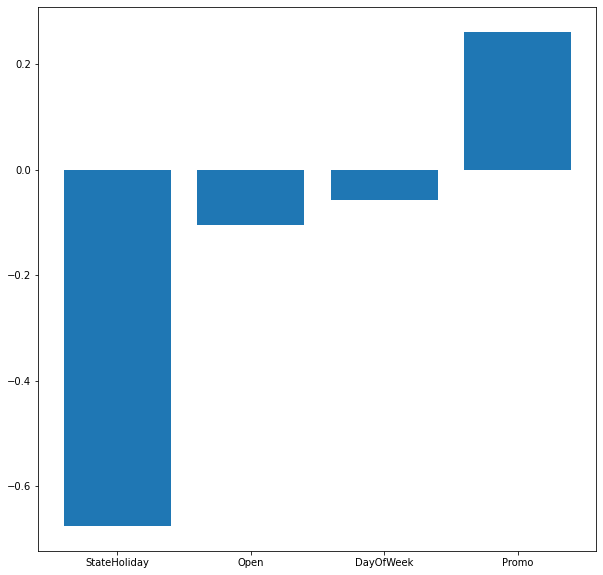

In [223]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x=feature_coef["Features"], height=feature_coef["Coef"])